## Learning Outcomes
1. Intro of image histogram: tells us the distribution of pizel intensity
2. Histogram equalization and its variant named CLAHE. Enhance the contrast of the image. Recall that we have learned scalar multiplication as one of contrast enhancement technique.
3. Thresholding (segmentation method)
    * Global thresholding
    * Otsu thresholding
4. Morphological operation (limit our scope to just binary image)
5. Color spaces and demo on color based segmentation

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
from util_func import *

import matplotlib.pyplot as plt
if not cv.useOptimized():
    cv.setUseOptimized(True)
cv.useOptimized()

True

## Image histogram


In [2]:
img = cv.imread('images/lena.jfif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [3]:
# 2 functions to calculate histogram
%timeit hist = cv.calcHist([gray], [0], None, [256], [0, 256])
%timeit hist, _ = np.histogram(gray.flatten(), 256)

42.8 µs ± 7.48 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.32 ms ± 331 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


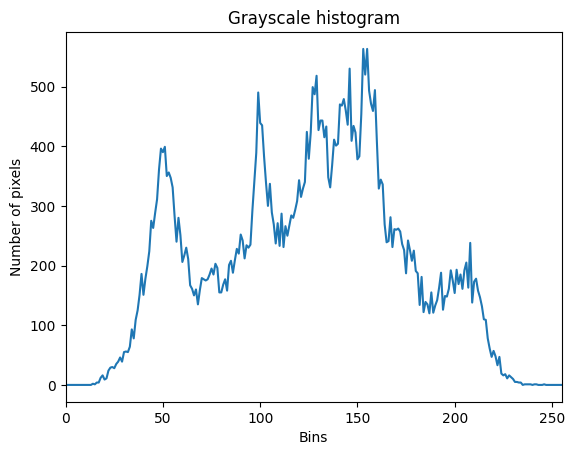

In [4]:
##
hist = cv.calcHist([gray], [0], None, [256], [0, 256])

plt.figure()
plt.plot(hist)
plt.title('Grayscale histogram')
plt.xlabel('Bins')
plt.ylabel('Number of pixels')
plt.xlim([0, 255])
plt.show()

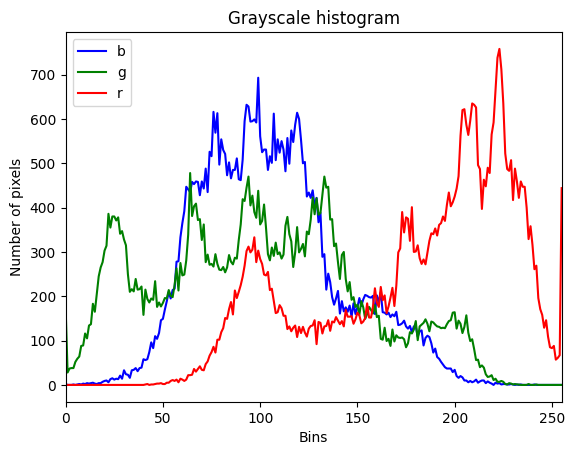

In [5]:
# color channel histogram
channels = cv.split(img)
colors = ('b', 'g', 'r')

plt.figure()
plt.title('Grayscale histogram')
plt.xlabel('Bins')
plt.ylabel('Number of pixels')
plt.xlim([0, 255])

for (ch, color) in zip(channels, colors):
    hist = cv.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color=color, label=color)
    
plt.legend()
plt.show()

In [6]:
hist.shape # output shows that it is a One-Dimensional histogram

(256, 1)

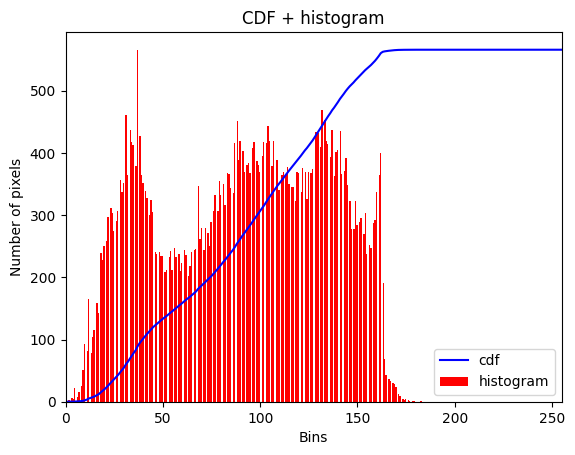

In [7]:
# show cdf (Cumulative Distribution Function)
img = cv.imread('images/low_contrast_img.jfif', 0)
hist = cv.calcHist([img], [0], None, [256], [0, 256])

# cdf
cdf = hist.cumsum() # cumulative sum
cdf_norm = cdf * hist.max() / cdf.max()

plt.plot(cdf_norm, color='b')
plt.hist(img.flatten(), 256, color='r')

plt.title('CDF + histogram')
plt.xlabel('Bins')
plt.ylabel('Number of pixels')
plt.xlim([0, 255])
plt.legend(('cdf', 'histogram'))
plt.show()

In [8]:
show_img('low contrast', img)

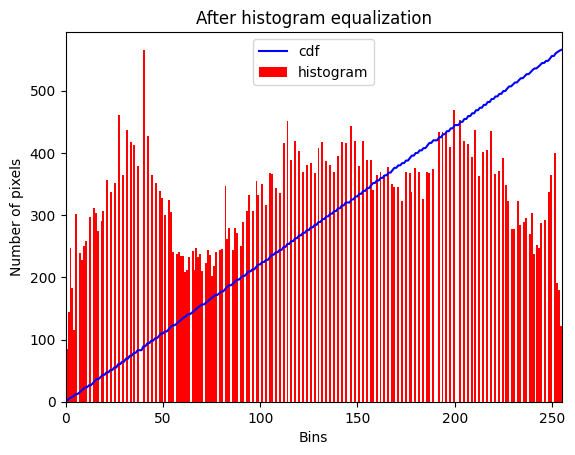

In [9]:
# perform histogram equalization
eq = cv.equalizeHist(img)
hist = cv.calcHist([eq], [0], None, [256], [0, 256])

# cdf
cdf = hist.cumsum() # cumulative sum
cdf_norm = cdf * hist.max() / cdf.max()

plt.plot(cdf_norm, color='b')
plt.hist(eq.flatten(), 256, color='r')

plt.title('After histogram equalization')
plt.xlabel('Bins')
plt.ylabel('Number of pixels')
plt.xlim([0, 255])
plt.legend(('cdf', 'histogram'))
plt.show()

In [10]:
cv.imshow('original', img)
show_img('equalized', eq)

In [11]:
# Variants of histogram equalization: CLAHE
# Performing histogram equalization on specific grids/tiles on the image
# instead of on the entire image

# img = cv.imread('images/winter_low_contrast.jfif', 0)
# img = cv.imread('images/winter.jfif', 0)
img = cv.imread('images/dog1.jfif', 0)

# equalization
eq = cv.equalizeHist(img)

# CLAHE
clahe = cv.createCLAHE(clipLimit=4, tileGridSize=(8, 8))
res = clahe.apply(img) # result

cv.imshow('original', img)
cv.imshow('equalization', eq)
show_img('clahe', res)

## Thresholding

In [12]:
# show types of thresholding in OpenCV
[i for i in dir(cv) if i.startswith('THRESH')]

['THRESH_BINARY',
 'THRESH_BINARY_INV',
 'THRESH_MASK',
 'THRESH_OTSU',
 'THRESH_TOZERO',
 'THRESH_TOZERO_INV',
 'THRESH_TRIANGLE',
 'THRESH_TRUNC']

In [13]:
img = np.fromfunction(lambda i, j: j, (50, 256), dtype=np.uint8)

def trackbar(x):
    _, img1 = cv.threshold(img, x, 255, cv.THRESH_BINARY)
    _, img2 = cv.threshold(img, x, 255, cv.THRESH_BINARY_INV)
    _, img3 = cv.threshold(img, x, 255, cv.THRESH_TRUNC)
    _, img4 = cv.threshold(img, x, 255, cv.THRESH_TOZERO)
    _, img5 = cv.threshold(img, x, 255, cv.THRESH_TOZERO_INV)
    
    cv.imshow('window', np.vstack((img1, img2, img3, img4, img5)))
    
cv.namedWindow('window')
cv.createTrackbar('threshold', 'window', 80, 255, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

In [14]:
# apply three different appraoches of segmentation (simple)

img = cv.imread('images/noisy.jfif')
show_img('show', img)

In [16]:
# convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 1st method
# val, th1 = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV)[1]

# 2nd method
# val, th2 = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU) [1]
                   
# 3rd method
blur = cv.GaussianBlur(gray, [5, 5], 0)
val, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU) [1]

img = [gray, 1, th1,
      gray, 0, th2,
      blur, 0, th3]

titles = ["Original noisy image", "histogram", "global thresholding",
         "Original noisy image", "histogram", "Otsu thresholding",
         "Smoothed image", "histogram", "Otsu thresholding"]

fig = plt.figure(figsize=(12, 12))
for i in range(3):
    plt.subplot(3, 3, 3*i+1), plt.imshow(img[3*i], 'gray')
    plt.title(titles[3*i]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, 3*i+2), plt.hist(img[3*i].ravel(), 256)
    plt.title(titles[3*i+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, 3*i+3), plt.imshow(img[3*i+2], 'gray')
    plt.title(titles[3*i+2]), plt.xticks([]), plt.yticks([])
    
plt.show()

ValueError: too many values to unpack (expected 2)

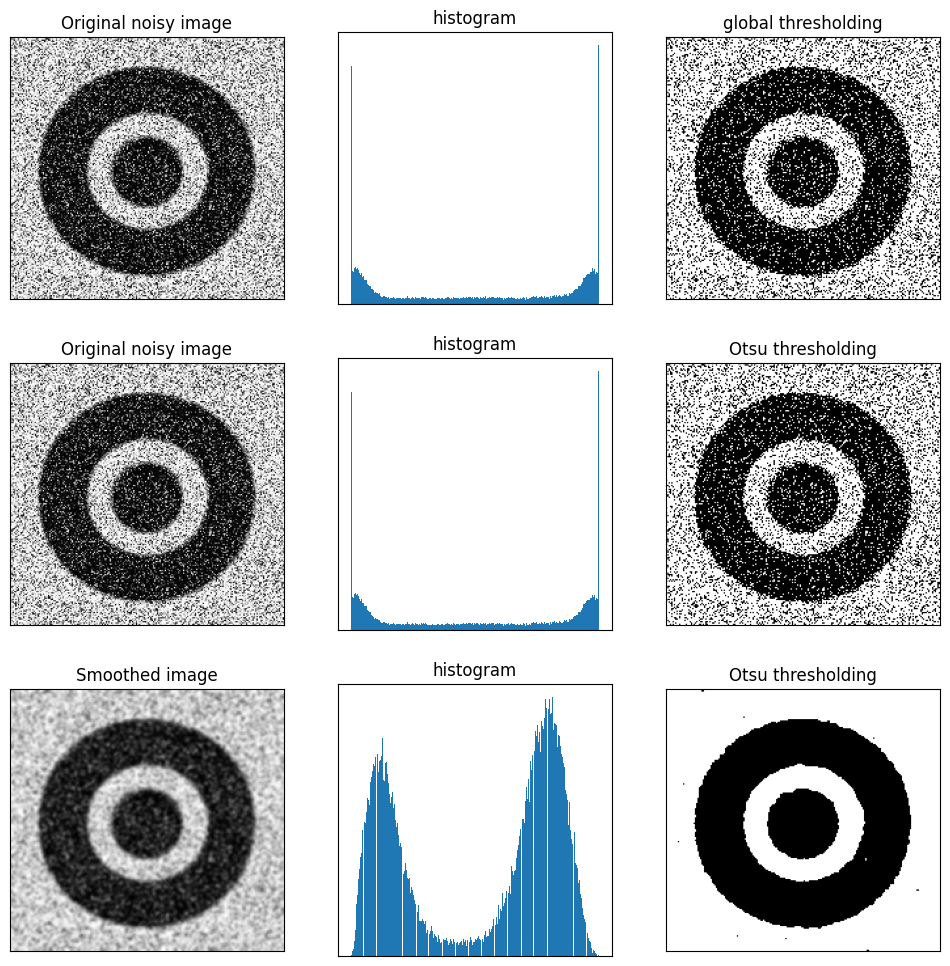

In [17]:
img = cv.imread('images/noisy.jfif', 0)

# global threshold
ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Otsu threshold
ret, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu threshold
blur = cv.GaussianBlur(img, (5, 5), 0)
ret, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

# Plot grayscale images, their histogram and the resulting thresholded image
images = [img, 0, th1,
         img, 0, th2,
         blur, 0, th3]

titles = ["Original noisy image", "histogram", "global thresholding",
         "Original noisy image", "histogram", "Otsu thresholding",
         "Smoothed image", "histogram", "Otsu thresholding"]

fig = plt.figure(figsize=(12, 12))
for i in range(3):
    plt.subplot(3, 3, 3*i+1), plt.imshow(images[3*i], 'gray')
    plt.title(titles[3*i]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, 3*i+2), plt.hist(images[3*i].ravel(), 256)
    plt.title(titles[3*i+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, 3*i+3), plt.imshow(images[3*i+2], 'gray')
    plt.title(titles[3*i+2]), plt.xticks([]), plt.yticks([])
    
plt.show()

In [18]:
print(f"T for otsu thresholding after Gaussian blurring: {ret}")

T for otsu thresholding after Gaussian blurring: 115.0


In [19]:
# erosion
kernel = np.ones((3, 3), dtype=np.uint8)

# erosion
erosion = cv.erode(th3, kernel, iterations=1)

img_combined = np.hstack((th3, erosion))
show_img('dilation', img_combined)

In [20]:
# change both kernel size and number of iteration
# trackbars
# setup trackbar function and a while loop

def nothing(x):
    pass

wn = 'window'
cv.namedWindow(wn)
cv.createTrackbar('size', wn, 3, 10, nothing)
cv.createTrackbar('iter', wn, 3, 10, nothing)

while(1):
    # retrieve size and iteration
    size = cv.getTrackbarPos('size', wn)
    if size < 3:
        size = 3
    
    iteration = cv.getTrackbarPos('iter', wn)
    if iteration < 1:
        iteration = 1
    
    kernel = np.ones((size, size), dtype=np.uint8)
    # opening (erosion (cv.erode) + dilation (cv.dilate))
    # closing (dilation + erosion)
    res = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel, iterations=iteration)
    cv.imshow(wn, res)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    
cv.destroyAllWindows()

## Color Spaces
- RGB
- HSV
    - H: Hue (encodes the color, expressed as angle. If you search for online color picker, angle is between 0 to 360. In OpenCV, $[0, 179]$)
    - S: Saturation (Purity of color, the higher the value; the purer it is.)
    - V: Value (Brightness / Illumination. If V is very high, there are strong light reflected from the surface, whereas low V indicates object has dark appearance)
    - Set up a pair of tuples $(H_1, S_1, V_1)$ and $(H_2, S_2, V_2)$: H_2 value must be higher than H_1, etc.

- CIELAB: L channel encodes lightness while A and B channel represents color. Designed for perceptual uniformity

In [21]:
img = cv.imread('images/lena.jfif')

# BGR to Lab
img_lab =cv.cvtColor(img, cv.COLOR_BGR2Lab)

# split
l, a, b = cv.split(img_lab)

# define sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
l_sharpened = cv.filter2D(l, -1, kernel)

# merge
img_sharpen = cv.merge((l_sharpened, a, b))

# change to bgr
img_sharpen = cv.cvtColor(img_sharpen, cv.COLOR_Lab2BGR)

cv.imshow('orginal', img)
show_img('sharpen', img_sharpen)

## Demo on Color-based Segmentation

In [22]:
img = cv.imread('images/color_space/pant.jfif')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [23]:
# visualize the pixels on a 3-dimensional plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib import cm

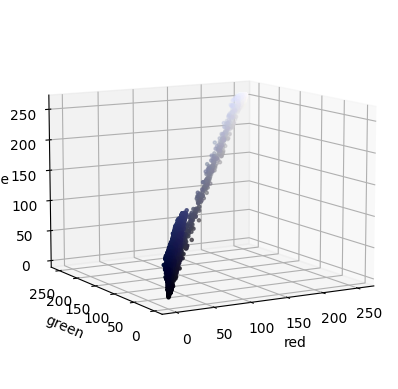

In [24]:
# RGB space
r, g, b = cv.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection='3d')

pixel_colors = img.reshape((-1, 3))
norm = colors.Normalize()
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.ravel(), g.ravel(), b.ravel(), facecolors = pixel_colors, marker = '.')
axis.view_init(elev=10, azim=240)
axis.set_xlabel('red')
axis.set_ylabel('green')
axis.set_zlabel('blue')
plt.show()

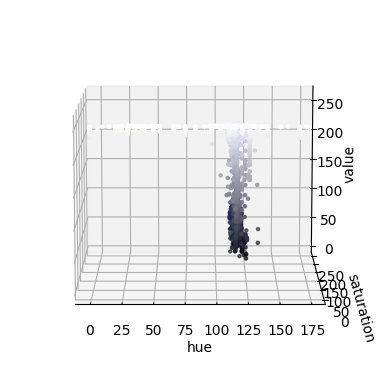

In [25]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
h, s, v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection='3d')

axis.scatter(h.ravel(), s.ravel(), v.ravel(), facecolors = pixel_colors, marker = '.')
axis.view_init(elev=10, azim=270)
axis.set_xlabel('hue')
axis.set_ylabel('saturation')
axis.set_zlabel('value')
plt.show()

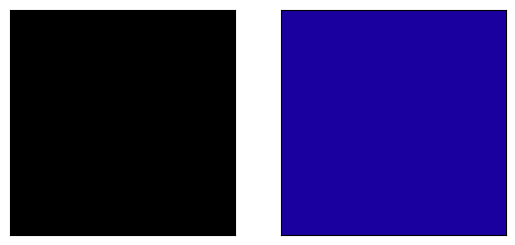

In [26]:
blue_low = (85, 90, 0)
blue_high = (125, 255, 160)

square1 = np.full((10, 10, 3), blue_low, dtype=np.uint8)
square2 = np.full((10, 10, 3), blue_high, dtype=np.uint8)

plt.subplot(121), plt_img(cv.cvtColor(square1, cv.COLOR_HSV2RGB))
plt.subplot(122), plt_img(cv.cvtColor(square2, cv.COLOR_HSV2RGB))
plt.show()

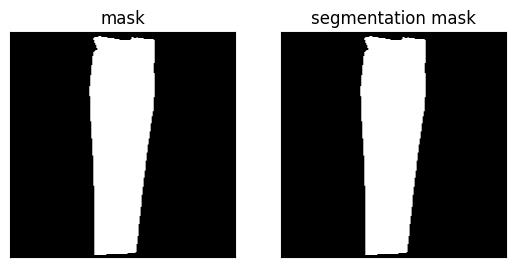

In [27]:
# color segmentation
mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask=mask)

plt.subplot(121), plt_img(mask, title='mask')
plt.subplot(122), plt_img(mask, title='segmentation mask')
plt.show()

# Exercise

In [28]:
# standardize the image size
resize_dim = (225, 225)

# create a custom color segmentation model
def color_segment(img, low_col, high_col, smooth=True):
    """Args:
    img: source image RGB
    color_low and color_high are tuples of color in HSV,
    smooth: boolean which control whether image will be blurred
    """
    ori_img = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5, 5), 0)
        
    # convert the RGB image to HSV image
    hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    # apply the blue mask
    mask = cv.inRange(hsv, low_col, high_col)
    
    # AND operator
    res = cv.bitwise_and(ori_img, ori_img, mask=mask)
    
    return res

# define the blue mask
blue_low = (80, 50, 0)
blue_high = (125, 255, 200)

# Create a list and load all input images into list
pant_list=[]

for i in range(1, 6):
    img_pant = cv.resize(cv.imread(f"images/color_space/pant{i}.jfif"), resize_dim)
    if img_pant is None:
        print(f"image {i} not read!")
        
    # pant = cv.cvtColor(img_pant, cv.COLOR_BGR2RGB)
    pant = cv.cvtColor(img_pant, cv.COLOR_BGR2RGB)
    pant_list.append(pant)
    
results = [color_segment(pant, blue_low, blue_high) for pant in pant_list]

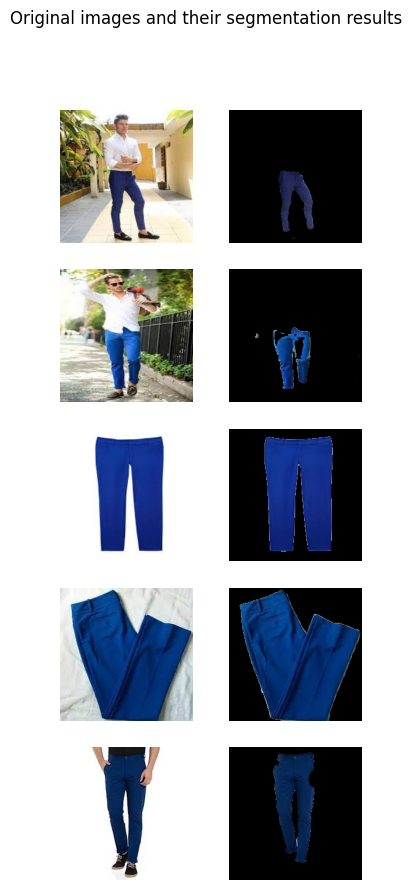

In [29]:
# Visualize
f, ax = plt.subplots(5, 2, figsize=(4, 10))

for i in range(5):
    ax[i][0].imshow(pant_list[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(results[i])
    ax[i][1].axis("off")

f.suptitle("Original images and their segmentation results")
plt.show()

# Weekly activity

## Setup

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from util_func import *

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

## Question 1

1. Write a program to segment the boat and the people on it from the background. Follow the instruction below:
    - Use 'boat.jpg' as input.
    - Apply Otsu thresholding.
    - Draw bounding box to identify the region where the boat and people are located.

In [47]:
# Load the input image
img = cv.imread('images/boat.jpg')

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Otsu thresholding
th2 = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

# Find contours in the thresholded image
contours, _ = cv.findContours(th2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around the boat and people
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the segmented image with bounding boxes
cv.imshow('Segmented Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

## Question 2

2. Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).
    - Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
    - Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.

In [8]:
# Morphological transformation function based on trackbar value
def morph(val):
    mgtd = cv.getTrackbarPos('Magnitude', 'Morphological Transformations')
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (mgtd, mgtd))

    eroded = cv.erode(thresholded, kernel, iterations=1)
    dilated = cv.dilate(thresholded, kernel, iterations=1)
    opened = cv.morphologyEx(thresholded, cv.MORPH_OPEN, kernel)
    closed = cv.morphologyEx(thresholded, cv.MORPH_CLOSE, kernel)

    result = cv.hconcat([eroded, dilated, opened, closed])
    cv.imshow('Morphological Transformations', result)

# Load the input image
image = cv.imread('images/leaf.jfif')
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

# Apply thresholding for leaf segmentation
_, thresholded = cv.threshold(gray, 128, 255, cv.THRESH_BINARY)

# Create window and trackbar
cv.namedWindow('Morphological Transformations')
cv.createTrackbar('Magnitude', 'Morphological Transformations', 3, 30, morph)

# Initialize with default value
morph(3)

cv.waitKey(0)
cv.destroyAllWindows()

## Question 3

3. Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

In [32]:
# standardize the image size
resize_dim = (225, 225)

# create a custom color segmentation model
def color_segment(img, low_col1, high_col1, low_col2, high_col2, smooth=True):
    """Args:
    img: source image RGB
    color_low and color_high are tuples of color in HSV,
    smooth: boolean which control whether image will be blurred
    """
    ori_img = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5, 5), 0)
        
    # convert the RGB image to HSV image
    hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    # apply the blue mask
    mask = cv.inRange(hsv, low_col1, high_col1)
    mask2 = cv.inRange(hsv, high_col1, high_col2)
    
    # OR operator
    sgmt_mask = cv.bitwise_or(mask, mask2)
    
    # AND operator
    res = cv.bitwise_and(ori_img, ori_img, mask=sgmt_mask)
    
    return res

# define the blue mask
blue_low = (80, 50, 0)
blue_high = (125, 255, 200)
white_low = (0, 0, 200)
white_high = (180, 30, 255)

# Create a list and load all input images into list
porcelain_list=[]

for i in range(1, 6):
    img_porcelain = cv.resize(cv.imread(f"images/color_space/porcelain{i}.jfif"), resize_dim)
    if img_porcelain is None:
        print(f"image {i} not read!")
        
    # porcelain = cv.cvtColor(img_porcelain, cv.COLOR_BGR2RGB)
    porcelain = cv.cvtColor(img_porcelain, cv.COLOR_BGR2RGB)
    porcelain_list.append(porcelain)
    
results = [color_segment(porcelain, blue_low, blue_high, white_low, white_high) for porcelain in porcelain_list]

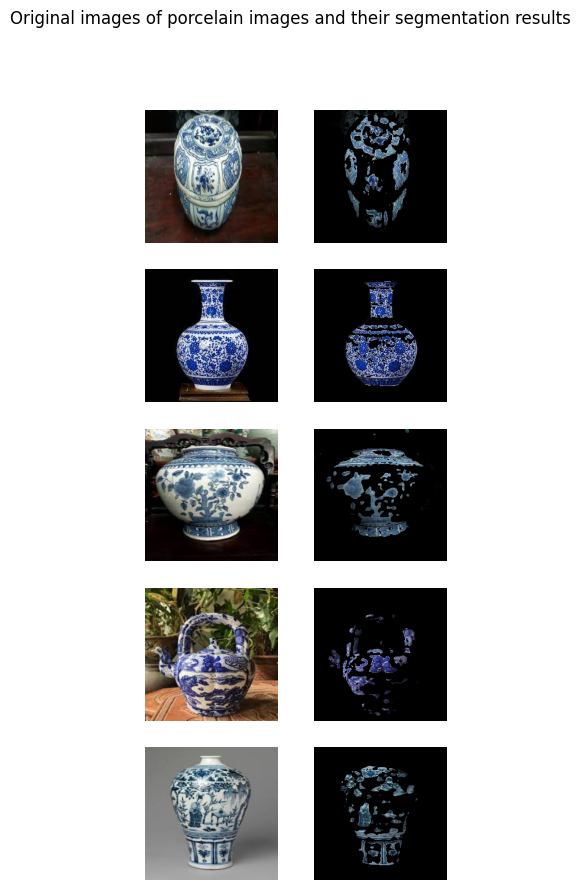

In [33]:
# Visualize
f, ax = plt.subplots(5, 2, figsize=(4, 10))

for i in range(5):
    ax[i][0].imshow(porcelain_list[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(results[i])
    ax[i][1].axis("off")

f.suptitle("Original images of porcelain images and their segmentation results")
plt.show()